In [1]:
import seaborn as sb
from scipy import stats
import math
import scipy
import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Dataset.csv')
data = data.fillna(0)


x = [0,0,0,0]
x[0] = np.array(data.iloc[:,0])
x[1] = np.array(data.iloc[:,1])
x[2] = np.array(data.iloc[:,2])
x[3] = np.array(data.iloc[:,3])


def covariation(x,y):
    return np.mean((x-np.mean(x))*(y-np.mean(y)))

d = {'0': [0,0,0,0],'1': [0,0,0,0],'2': [0,0,0,0],'3': [0,0,0,0]}
C = pd.DataFrame(data=d)
for i in range(4):
    for j in range(4):
        C.iloc[i,j] = round(covariation(x[i],x[j])/(np.sqrt(covariation(x[i],x[i]))*np.sqrt(covariation(x[j],x[j]))),2)




In [ ]:
#2
def generate(n):
    phi = stats.uniform.rvs(loc=0,scale=2*math.pi,size=n)
    spr = stats.uniform.rvs(loc=-1/4,scale=1/2,size=n)
    x = [0,0,0]
    y = [0,0,0]
    x[0] = np.zeros(n)
    y[0] = np.zeros(n)
    for i in range(n):
        x[0][i] = (1+spr[i])*math.cos(phi[i])
        y[0][i] = (1+spr[i])*math.sin(phi[i])

    
    eps = 1/4
    x[1] = np.zeros(n)
    y[1] = np.zeros(n)
    for i in range(n):
        cloud = stats.multinomial.rvs(n=1,p=[1/4,1/4,1/4,1/4],size=1)
        number = np.where(cloud[0] == 1)[0][0]
        phi = stats.uniform.rvs(loc=0,scale=2*math.pi,size=n)
        spr = stats.uniform.rvs(loc=0,scale=eps,size=n)
        if number == 0:
            x[1][i] = 1+spr[i]*math.cos(phi[i])
            y[1][i] = 1+spr[i]*math.sin(phi[i])
        if number == 1:
            x[1][i] = -1+spr[i]*math.cos(phi[i])
            y[1][i] = 1+spr[i]*math.sin(phi[i])
        if number == 2:
            x[1][i] = -1+spr[i]*math.cos(phi[i])
            y[1][i] = -1+spr[i]*math.sin(phi[i])
        if number == 3:
            x[1][i] = 1+spr[i]*math.cos(phi[i])
            y[1][i] = -1+spr[i]*math.sin(phi[i])
    

    x[2] = np.zeros(n)
    y[2] = np.zeros(n)
    phi = stats.uniform.rvs(loc=0,scale=6*math.pi,size=n)
    spr = stats.uniform.rvs(loc=-1/4,scale=1/2,size=n)
    for i in range(n):
        x[2][i] = (spr[i]+phi[i])/math.pi*math.cos(phi[i])
        y[2][i] = (spr[i]+phi[i])/math.pi*math.sin(phi[i])
        
        
    return x,y



fig, ax = plt.subplots(1,3,figsize=(17,5))
x,y = generate(100)
sb.scatterplot(x=x[0],y=y[0],ax=ax[0])
sb.scatterplot(x=x[1],y=y[1],ax=ax[1])
sb.scatterplot(x=x[2],y=y[2],ax=ax[2])



n = 100
N = 50
p_SR_1 = np.zeros(N)
p_SR_2 = np.zeros(N)
p_SR_3 = np.zeros(N)
p_KEN_1 = np.zeros(N)
p_KEN_2 = np.zeros(N)
p_KEN_3 = np.zeros(N)
p_CHI_1 = np.zeros(N)
p_CHI_2 = np.zeros(N)
p_CHI_3 = np.zeros(N)



for k in range(N):
    x, y = generate(n) 
    p_SR_1[k] = hyppo.independence.Dcorr().test(x[0],y[0]).pvalue #I тип
    p_SR_2[k] = hyppo.independence.Dcorr().test(x[1],y[1]).pvalue #II тип
    p_SR_3[k] = hyppo.independence.Dcorr().test(x[2],y[2]).pvalue #III тип
    p_KEN_1[k] = stats.kendalltau(x[0],y[0]).pvalue
    p_KEN_2[k] = stats.kendalltau(x[1],y[1]).pvalue
    p_KEN_3[k] = stats.kendalltau(x[2],y[2]).pvalue
    
    
    
    #для хи-квадрата 4 ячейки - классические четверти плоскости (4 < 7 \approx \sqrt{50})
    freq_obs = [[[0,0],[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0],[0,0]]]
    for i in range(n):
        for j in range(3):
            if j == 0:
                if x[j][i] > 1.25-2.25/3:
                    if y[j][i] > 0:
                        freq_obs[j][0][0] += 1
                    else:
                        freq_obs[j][0][1] += 1
                elif -1.25 + 2.25/3 < x[j][i] < 1.25-2.25/3:
                    if y[j][i] > 0:
                        freq_obs[j][1][0] += 1
                    else:
                        freq_obs[j][1][1] += 1
                elif x[j][i] < -1.25+2.25/3:
                    if y[j][i] < 0:
                        freq_obs[j][2][0] += 1
                    else:
                        freq_obs[j][2][1] += 1
            if j == 1:
                 if x[j][i] > 0:
                    if y[j][i] > 0:
                        freq_obs[j][0][0] += 1
                    else:
                        freq_obs[j][0][1] += 1
                else:
                    if y[j][i] > 0:
                        freq_obs[j][1][0] += 1
                    else:
                        freq_obs[j][1][1] += 1
            if j == 2:
                if x[j][i] > 2:
                    if y[j][i] > 0:
                        freq_obs[j][0][0] += 1
                    else:
                        freq_obs[j][0][1] += 1
                elif -2 < x[j][i] < 2:
                    if y[j][i] > 0:
                        freq_obs[j][1][0] += 1
                    else:
                        freq_obs[j][1][1] += 1
                elif x[j][i] < -2:
                    if y[j][i] < 0:
                        freq_obs[j][2][0] += 1
                    else:
                        freq_obs[j][2][1] += 1
    p_CHI_1[k] = stats.chi2_contingency(freq_obs[0]).pvalue
    p_CHI_2[k] = stats.chi2_contingency(freq_obs[1]).pvalue
    p_CHI_3[k] = stats.chi2_contingency(freq_obs[2]).pvalue
    
    
    
fig, ax = plt.subplots(3,3,figsize=(17,17))
ax[0][0].hist(np.sort(p_SR_1),bins=50,cumulative=True,density=True,range=[0,1])
ax[0][0].set_title('1 SR')
ax[0][1].hist(np.sort(p_SR_2),bins=50,cumulative=True,density=True,range=[0,1])
ax[0][1].set_title('2 SR')
ax[0][2].hist(np.sort(p_SR_3),bins=50,cumulative=True,density=True,range=[0,1])
ax[0][2].set_title('3 SR')
ax[1][0].hist(np.sort(p_KEN_1),bins=50,cumulative=True,density=True,range=[0,1])
ax[1][0].set_title('1 KEN')
ax[1][1].hist(np.sort(p_KEN_2),bins=50,cumulative=True,density=True,range=[0,1])
ax[1][1].set_title('2 KEN')
ax[1][2].hist(np.sort(p_KEN_3),bins=50,cumulative=True,density=True,range=[0,1])
ax[1][2].set_title('3 KEN')
ax[2][0].hist(np.sort(p_CHI_1),bins=50,cumulative=True,density=True,range=[0,1])
ax[2][0].set_title('1 CHI')
ax[2][1].hist(np.sort(p_CHI_2),bins=50,cumulative=True,density=True,range=[0,1])
ax[2][1].set_title('2 CHI')
ax[2][2].hist(np.sort(p_CHI_3),bins=50,cumulative=True,density=True,range=[0,1])
ax[2][2].set_title('3 CHI')
                
plt.show()

n = 50


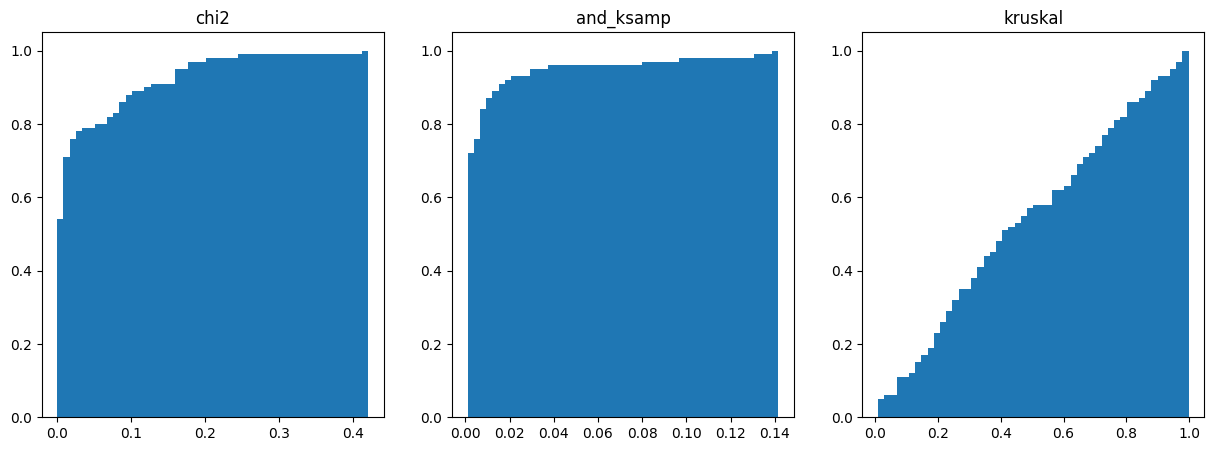

In [274]:
#4(a) N(0, 2+i) i = 0,1,2,3,4

#параметры
N = 100
n = 50
I = [0,1,2,3,4]
alpha = 0.05

#генерация
def generate(I):
    X = []
    k = len(I)
    for i in range(k):
        X.append(scipy.stats.norm.rvs(loc=0,scale=2+I[i],size=n))
    X = np.array(X)
    return X

#хи-квадрат
def chisquare(X): #тут X - сразу все выборки
    n = len(X[0]) #размер выборки
    k = len(X) #число выборок
    a = round(np.log(n)/np.log(2)) #число ячеек
    
    left = np.min(X) #границы ячеек
    right = np.max(X)
    step = (right - left) / a
    delta = np.zeros(a, dtype=object)
    for i in range(a):
        delta[i] = [left + i * step, left + (i + 1) * step]
    delta[0][0] -= 1 #так надо
    delta[-1][1] += 1
    
    nu = np.zeros([k,a]) #частоты
    for i in range(k):
        for j in range(a):
            nu[i][j] = np.sum((X[i] > delta[j][0])&(X[i] <= delta[j][1])) #потом сумма по axis=0, проверил
    
    T = 0 # статистика
    for i in range(k):
        for j in range(a):
            T += (nu[i][j] - (1. / k) * nu.sum(axis=0)[j])**2 / ((1. / k) * nu.sum(axis=0)[j])

    pvalue = 1-scipy.stats.chi2.cdf(T,df=k*a-1)
    return pvalue

p_chi = np.zeros(N)
p_S = np.zeros(N)
p_K = np.zeros(N)
for i in range(N):
    X = generate(I)
    p_chi[i] = chisquare(X)
    p_S[i] = scipy.stats.anderson_ksamp(X).pvalue
    p_K[i] = scipy.stats.kruskal(X[0],X[1],X[2],X[3],X[4]).pvalue
p_chi = np.sort(p_chi)
p_S = np.sort(p_S)
p_K = np.sort(p_K)
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(p_chi,cumulative=True,density=True,bins=50)
ax[0].set_title('chi2')
ax[1].hist(p_S,cumulative=True,density=True,bins=50)
ax[1].set_title('and_ksamp')
ax[2].hist(p_K,cumulative=True,density=True,bins=50)
ax[2].set_title('kruskal')
print('n =',n)
plt.show()

n = 40


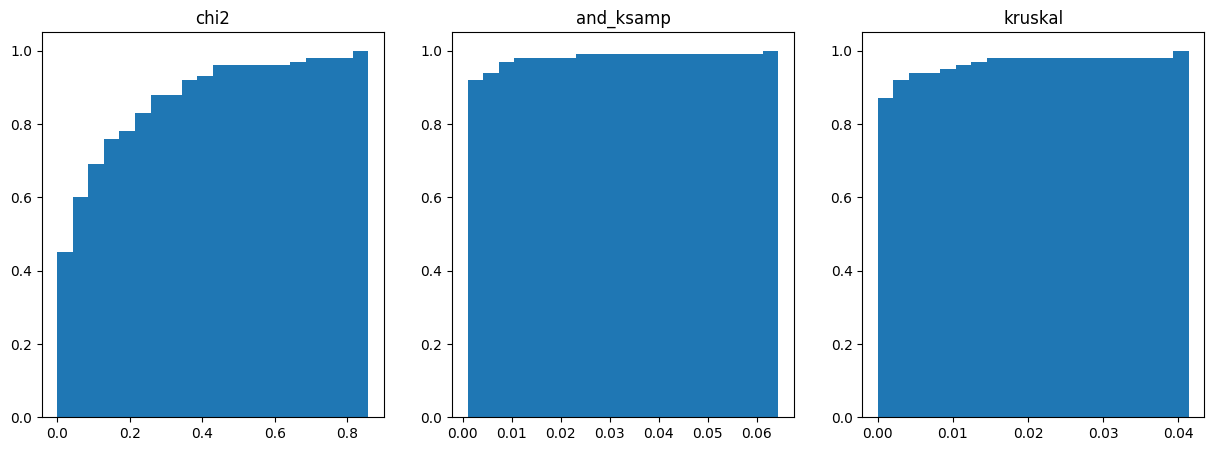

In [275]:
#4(b) N(i/4, 1) i = 0,1,2,3,4

#параметры
N = 100
n = 40
I = [0,1,2,3,4]
alpha = 0.05

#генерация
def generate(I):
    X = []
    k = len(I)
    for i in range(k):
        X.append(scipy.stats.norm.rvs(loc=I[i]/4,scale=1,size=n))
    X = np.array(X)
    return X

#хи-квадрат
def chisquare(X): #тут X - сразу все выборки
    n = len(X[0]) #размер выборки
    k = len(X) #число выборок
    a = round(np.log(n)/np.log(2)) #число ячеек
    
    left = np.min(X) #границы ячеек
    right = np.max(X)
    step = (right - left) / a
    delta = np.zeros(a, dtype=object)
    for i in range(a):
        delta[i] = [left + i * step, left + (i + 1) * step]
    delta[0][0] -= 1 #так надо
    delta[-1][1] += 1
    
    nu = np.zeros([k,a]) #частоты
    for i in range(k):
        for j in range(a):
            nu[i][j] = np.sum((X[i] > delta[j][0])&(X[i] <= delta[j][1])) #потом сумма по axis=0, проверил
    
    T = 0 # статистика
    for i in range(k):
        for j in range(a):
            T += (nu[i][j] - (1. / k) * nu.sum(axis=0)[j])**2 / ((1. / k) * nu.sum(axis=0)[j])

    pvalue = scipy.stats.chi2.sf(T,df=k*a-1)
    return pvalue

p_chi = np.zeros(N)
p_S = np.zeros(N)
p_K = np.zeros(N)
for i in range(N):
    X = generate(I)
    p_chi[i] = chisquare(X)
    p_S[i] = scipy.stats.anderson_ksamp(X).pvalue
    p_K[i] = scipy.stats.kruskal(X[0],X[1],X[2],X[3],X[4]).pvalue
p_chi = np.sort(p_chi)
p_S = np.sort(p_S)
p_K = np.sort(p_K)
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(p_chi,cumulative=True,density=True,bins=20)
ax[0].set_title('chi2')
ax[1].hist(p_S,cumulative=True,density=True,bins=20)
ax[1].set_title('and_ksamp')
ax[2].hist(p_K,cumulative=True,density=True,bins=20)
ax[2].set_title('kruskal')
print('n =',n)
plt.show()

n = 2500


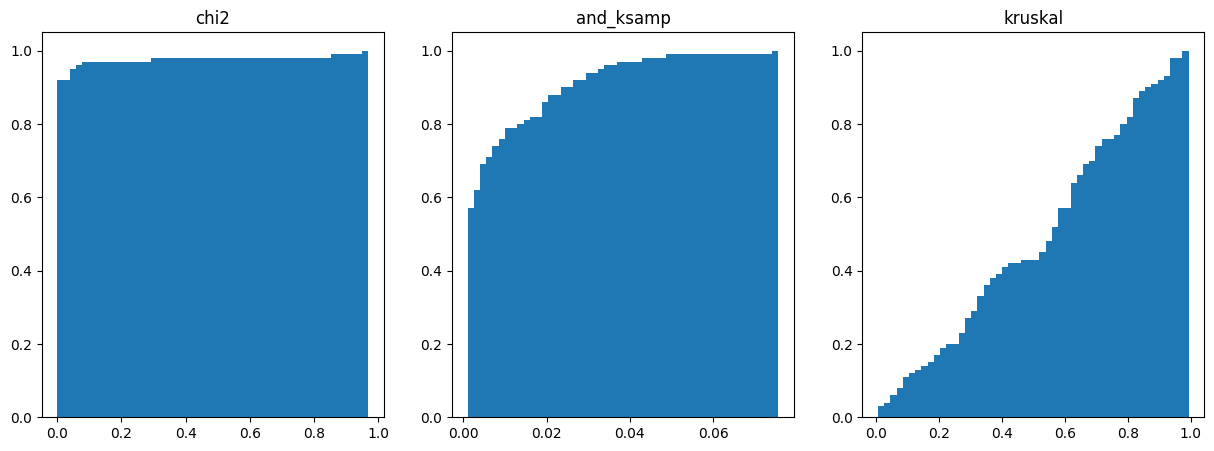

In [262]:
#4(c) t_{3+i} i = 0,1,2,3,4

#параметры
N = 100
n = 2500
I = [0,1,2,3,4]
alpha = 0.05

#генерация
def generate(I):
    X = []
    k = len(I)
    for i in range(k):
        X.append(scipy.stats.t.rvs(df=3+I[i],size=n))
    X = np.array(X)
    return X

#хи-квадрат
def chisquare(X): #тут X - сразу все выборки
    n = len(X[0]) #размер выборки
    k = len(X) #число выборок
    a = round(np.log(n)/np.log(2)) #число ячеек
    
    left = np.min(X) #границы ячеек
    right = np.max(X)
    step = (right - left) / a
    delta = np.zeros(a, dtype=object)
    for i in range(a):
        delta[i] = [left + i * step, left + (i + 1) * step]
    delta[0][0] -= 1 #так надо
    delta[-1][1] += 1
    
    nu = np.zeros([k,a]) #частоты
    for i in range(k):
        for j in range(a):
            nu[i][j] = np.sum((X[i] > delta[j][0])&(X[i] <= delta[j][1])) #потом сумма по axis=0, проверил
    
    T = 0 # статистика
    for i in range(k):
        for j in range(a):
            if nu.sum(axis=0)[j] != 0:
                T += (nu[i][j] - (1. / k) * nu.sum(axis=0)[j])**2 / ((1. / k) * nu.sum(axis=0)[j])

    pvalue = scipy.stats.chi2.sf(T,df=k*a-1)
    global alpha
    return pvalue

p_chi = np.zeros(N)
p_S = np.zeros(N)
p_K = np.zeros(N)
for i in range(N):
    X = generate(I)
    p_chi[i] = chisquare(X)
    p_S[i] = scipy.stats.anderson_ksamp(X).pvalue
    p_K[i] = scipy.stats.kruskal(X[0],X[1],X[2],X[3],X[4]).pvalue
p_chi = np.sort(p_chi)
p_S = np.sort(p_S)
p_K = np.sort(p_K)
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(p_chi,cumulative=True,density=True,bins=50)
ax[0].set_title('chi2')
ax[1].hist(p_S,cumulative=True,density=True,bins=50)
ax[1].set_title('and_ksamp')
ax[2].hist(p_K,cumulative=True,density=True,bins=50)
ax[2].set_title('kruskal')
print('n =',n)
plt.show()

In [2]:
a = np.array([1,1,1])
b = np.array([2,2,2])
c = b**2
print(c)

[4 4 4]
